# Exploratory Data Analysis<a id='2_Data_wrangling'></a>

## Introduction<a id='2.2_Introduction'></a>

Lending loans is a significant source of revenue for banks, but it is not without risk. Loan defaults by borrowers are a common occurrence. To address this issue, we can use machine learning techniques to develop a robust model that can predict whether a new borrower is likely to default on their loan. The banks have gathered extensive data on past borrowers, and we can help to create a powerful machine learning model for this purpose.

The dataset provided is vast and includes various deterministic factors such as borrower's income, gender, loan purpose, and more. However, the dataset has issues with multicollinearity and missing values and we will try to fix these issues in this notebook.

## 1. Data Collection<a id='2.3_Imports'></a>

In [63]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import os


## 1.1 Load The Loan Default Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [64]:
# the supplied CSV data file is the raw_data directory
loan_data = pd.read_csv('C:/Springboard/Capstone2/Loan_Default.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [65]:
#Call the info method on loan_data to see a summary of the file
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [66]:
#Call the head method on loan_data to print the first several rows of the data
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## 2. Data Definition<a id='2.6_Explore_The_Data'></a>

### 2.1 Explore the features of our data<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [67]:
#Set number of columns to display all 34 columns
pd.set_option("display.max_columns", loan_data.shape[-1]) 
loan_data.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [68]:
loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [69]:
#convert all features to lower case
loan_data.columns= loan_data.columns.str.lower()

In [70]:
#check result
loan_data.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

To streamline the data and optimize the model's performance, we are selectively dropping unnecessary columns that are unlikely to have a significant impact on the results.

In [71]:
columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','age', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'region', 'security_type']
loan_data.drop(columns, axis=1, inplace =True)

In [72]:
loan_data.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1'],
      dtype='object')

### 2.2 Factors overview<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Let look at some factors of loan application in detail:

In [73]:
loan_data['loan_amount'].max()

3576500

In [74]:
loan_data['loan_amount'].min()

16500

In [75]:
loan_data['term'].value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64

In [76]:
loan_data['rate_of_interest'].max()

8.0

In [77]:
#the factor we should pay attention for
loan_data['rate_of_interest'].min()

0.0

In [78]:
loan_data['rate_of_interest'].mean()

4.045475804366537

In [79]:
loan_data['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [80]:
loan_data['property_value'].max()

16508000.0

In [82]:
loan_data['property_value'].min()

8000.0

In [81]:
loan_data['property_value'].value_counts()

308000.0     2792
258000.0     2763
358000.0     2679
408000.0     2537
328000.0     2524
             ... 
4648000.0       1
3878000.0       1
5758000.0       1
2618000.0       1
2698000.0       1
Name: property_value, Length: 385, dtype: int64

In [83]:
loan_data['income'].max()

578580.0

In [84]:
loan_data['income'].min()

0.0

In [85]:
loan_data['income'].mean()

6957.338876146789

## 3. Data Cleaning<a id='2.6_Explore_The_Data'></a>

### 3.1 Duplicates and missing values<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

First we check for duplicated entries and delete if we find them.

In [86]:
loan_data.duplicated().sum()

28

In [87]:
loan_data.drop_duplicates(inplace=True)

In [88]:
loan_data.duplicated().sum()

0

In [89]:
loan_data.shape

(148642, 12)

Now check for missing values in each column.

In [90]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
upfront_charges,39614,26.650610
interest_rate_spread,36611,24.630320
rate_of_interest,36411,24.495768
dtir1,24093,16.208743
property_value,15072,10.139799
ltv,15072,10.139799
income,9148,6.154384
term,41,0.027583
loan_type,0,0.000000
loan_amount,0,0.000000


We can see many columns with null values. We start working with them based on their data type.

In [91]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148642 entries, 0 to 148669
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_type             148642 non-null  object 
 1   loan_amount           148642 non-null  int64  
 2   rate_of_interest      112231 non-null  float64
 3   interest_rate_spread  112031 non-null  float64
 4   upfront_charges       109028 non-null  float64
 5   term                  148601 non-null  float64
 6   property_value        133570 non-null  float64
 7   income                139494 non-null  float64
 8   credit_score          148642 non-null  int64  
 9   ltv                   133570 non-null  float64
 10  status                148642 non-null  int64  
 11  dtir1                 124549 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 14.7+ MB


### 3.2 Divide and conquer <a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Devide data for categorical and numerical values and handle each of them separately.

In [92]:
dtypes = pd.DataFrame(loan_data.dtypes).reset_index()

categ_type = []
numer_type = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        categ_type.append(i)
    else:
        numer_type.append(i)

In [93]:
#Start with numeric data type
loan_data_num = loan_data[numer_type]

#knn
knn = KNNImputer(n_neighbors = 3)
knn.fit(loan_data_num)
X = knn.fit_transform(loan_data_num)

#Check for any nas
loan_data_num = pd.DataFrame(X, columns=numer_type)
nas_num = loan_data_num.isna().sum()
print(nas_num)


loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


In [94]:
# Categorical data type
loan_data_cat = loan_data[categ_type]

for i in categ_type:
    mode = loan_data[i].mode()
    mode = mode[0]
    loan_data_cat[i].fillna(value=mode, inplace=True)

# Check for any nas
nas_cat = loan_data_cat.isna().sum()
print(nas_cat)

loan_type    0
dtype: int64


C:\Users\bayar\AppData\Local\Temp\ipykernel_16904\3135984884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cat[i].fillna(value=mode, inplace=True)


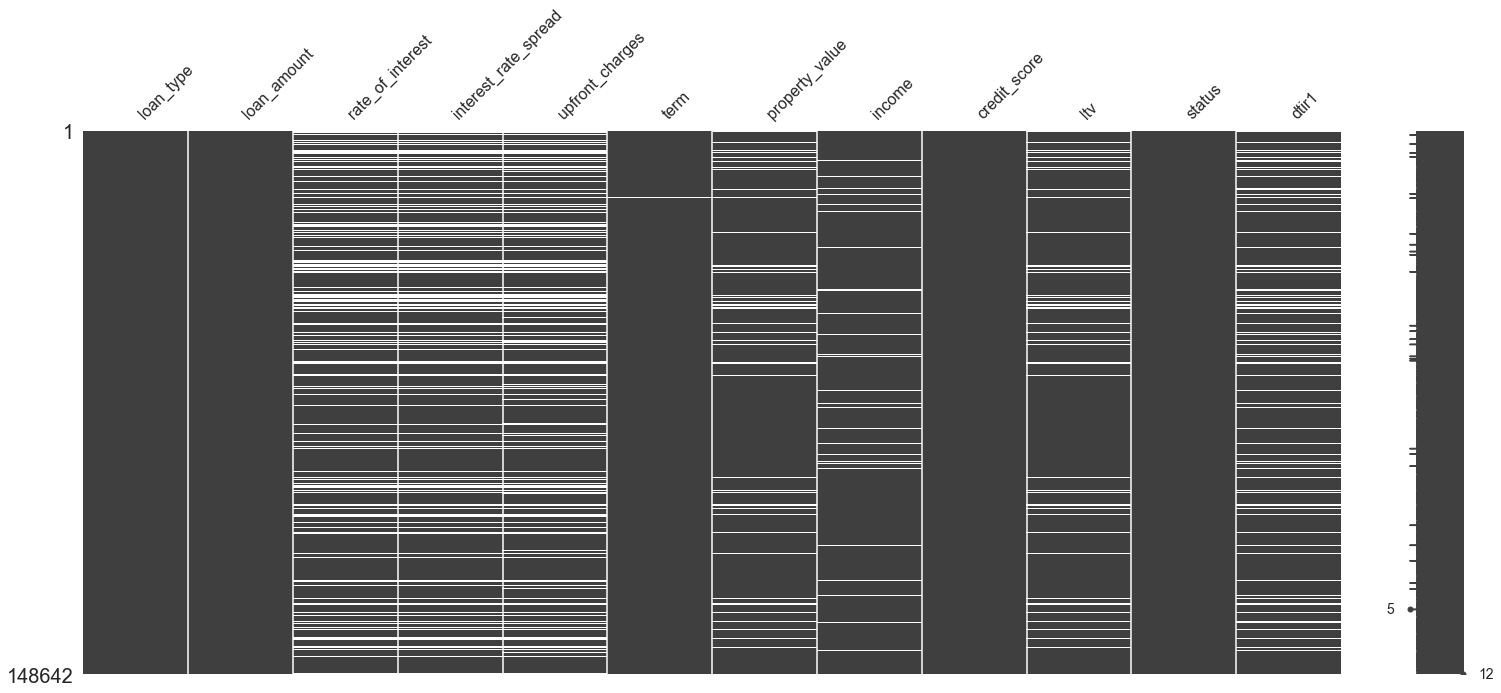

<Figure size 1080x648 with 0 Axes>

In [95]:
import missingno as msno

# Full dataframe visualization of null values
msno.matrix(loan_data)
plt.figure(figsize = (15,9))
plt.show()

In [96]:
loan_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148642 entries, 0 to 148669
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   loan_type  148642 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


Convert our categorical data into numerical for machine learning model.

In [97]:
loan_data_cat = pd.get_dummies(loan_data_cat, columns=categ_type, drop_first=True)

In [98]:
loan_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148642 entries, 0 to 148669
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   loan_type_type2  148642 non-null  uint8
 1   loan_type_type3  148642 non-null  uint8
dtypes: uint8(2)
memory usage: 1.4 MB


In [99]:
# Combining dataframes
loan_data_comb = pd.concat([loan_data_num, loan_data_cat], axis=1, join='inner')

In [100]:
loan_data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148614 entries, 0 to 148641
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           148614 non-null  float64
 1   rate_of_interest      148614 non-null  float64
 2   interest_rate_spread  148614 non-null  float64
 3   upfront_charges       148614 non-null  float64
 4   term                  148614 non-null  float64
 5   property_value        148614 non-null  float64
 6   income                148614 non-null  float64
 7   credit_score          148614 non-null  float64
 8   ltv                   148614 non-null  float64
 9   status                148614 non-null  float64
 10  dtir1                 148614 non-null  float64
 11  loan_type_type2       148614 non-null  uint8  
 12  loan_type_type3       148614 non-null  uint8  
dtypes: float64(11), uint8(2)
memory usage: 13.9 MB


Now all our dataset is clean and ready to be used for training.

## 4. Visualization and Correlations<a id='2.6_Explore_The_Data'></a>

With our data now in a pristine state, it's time to delve into some exploration and analysis. We begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

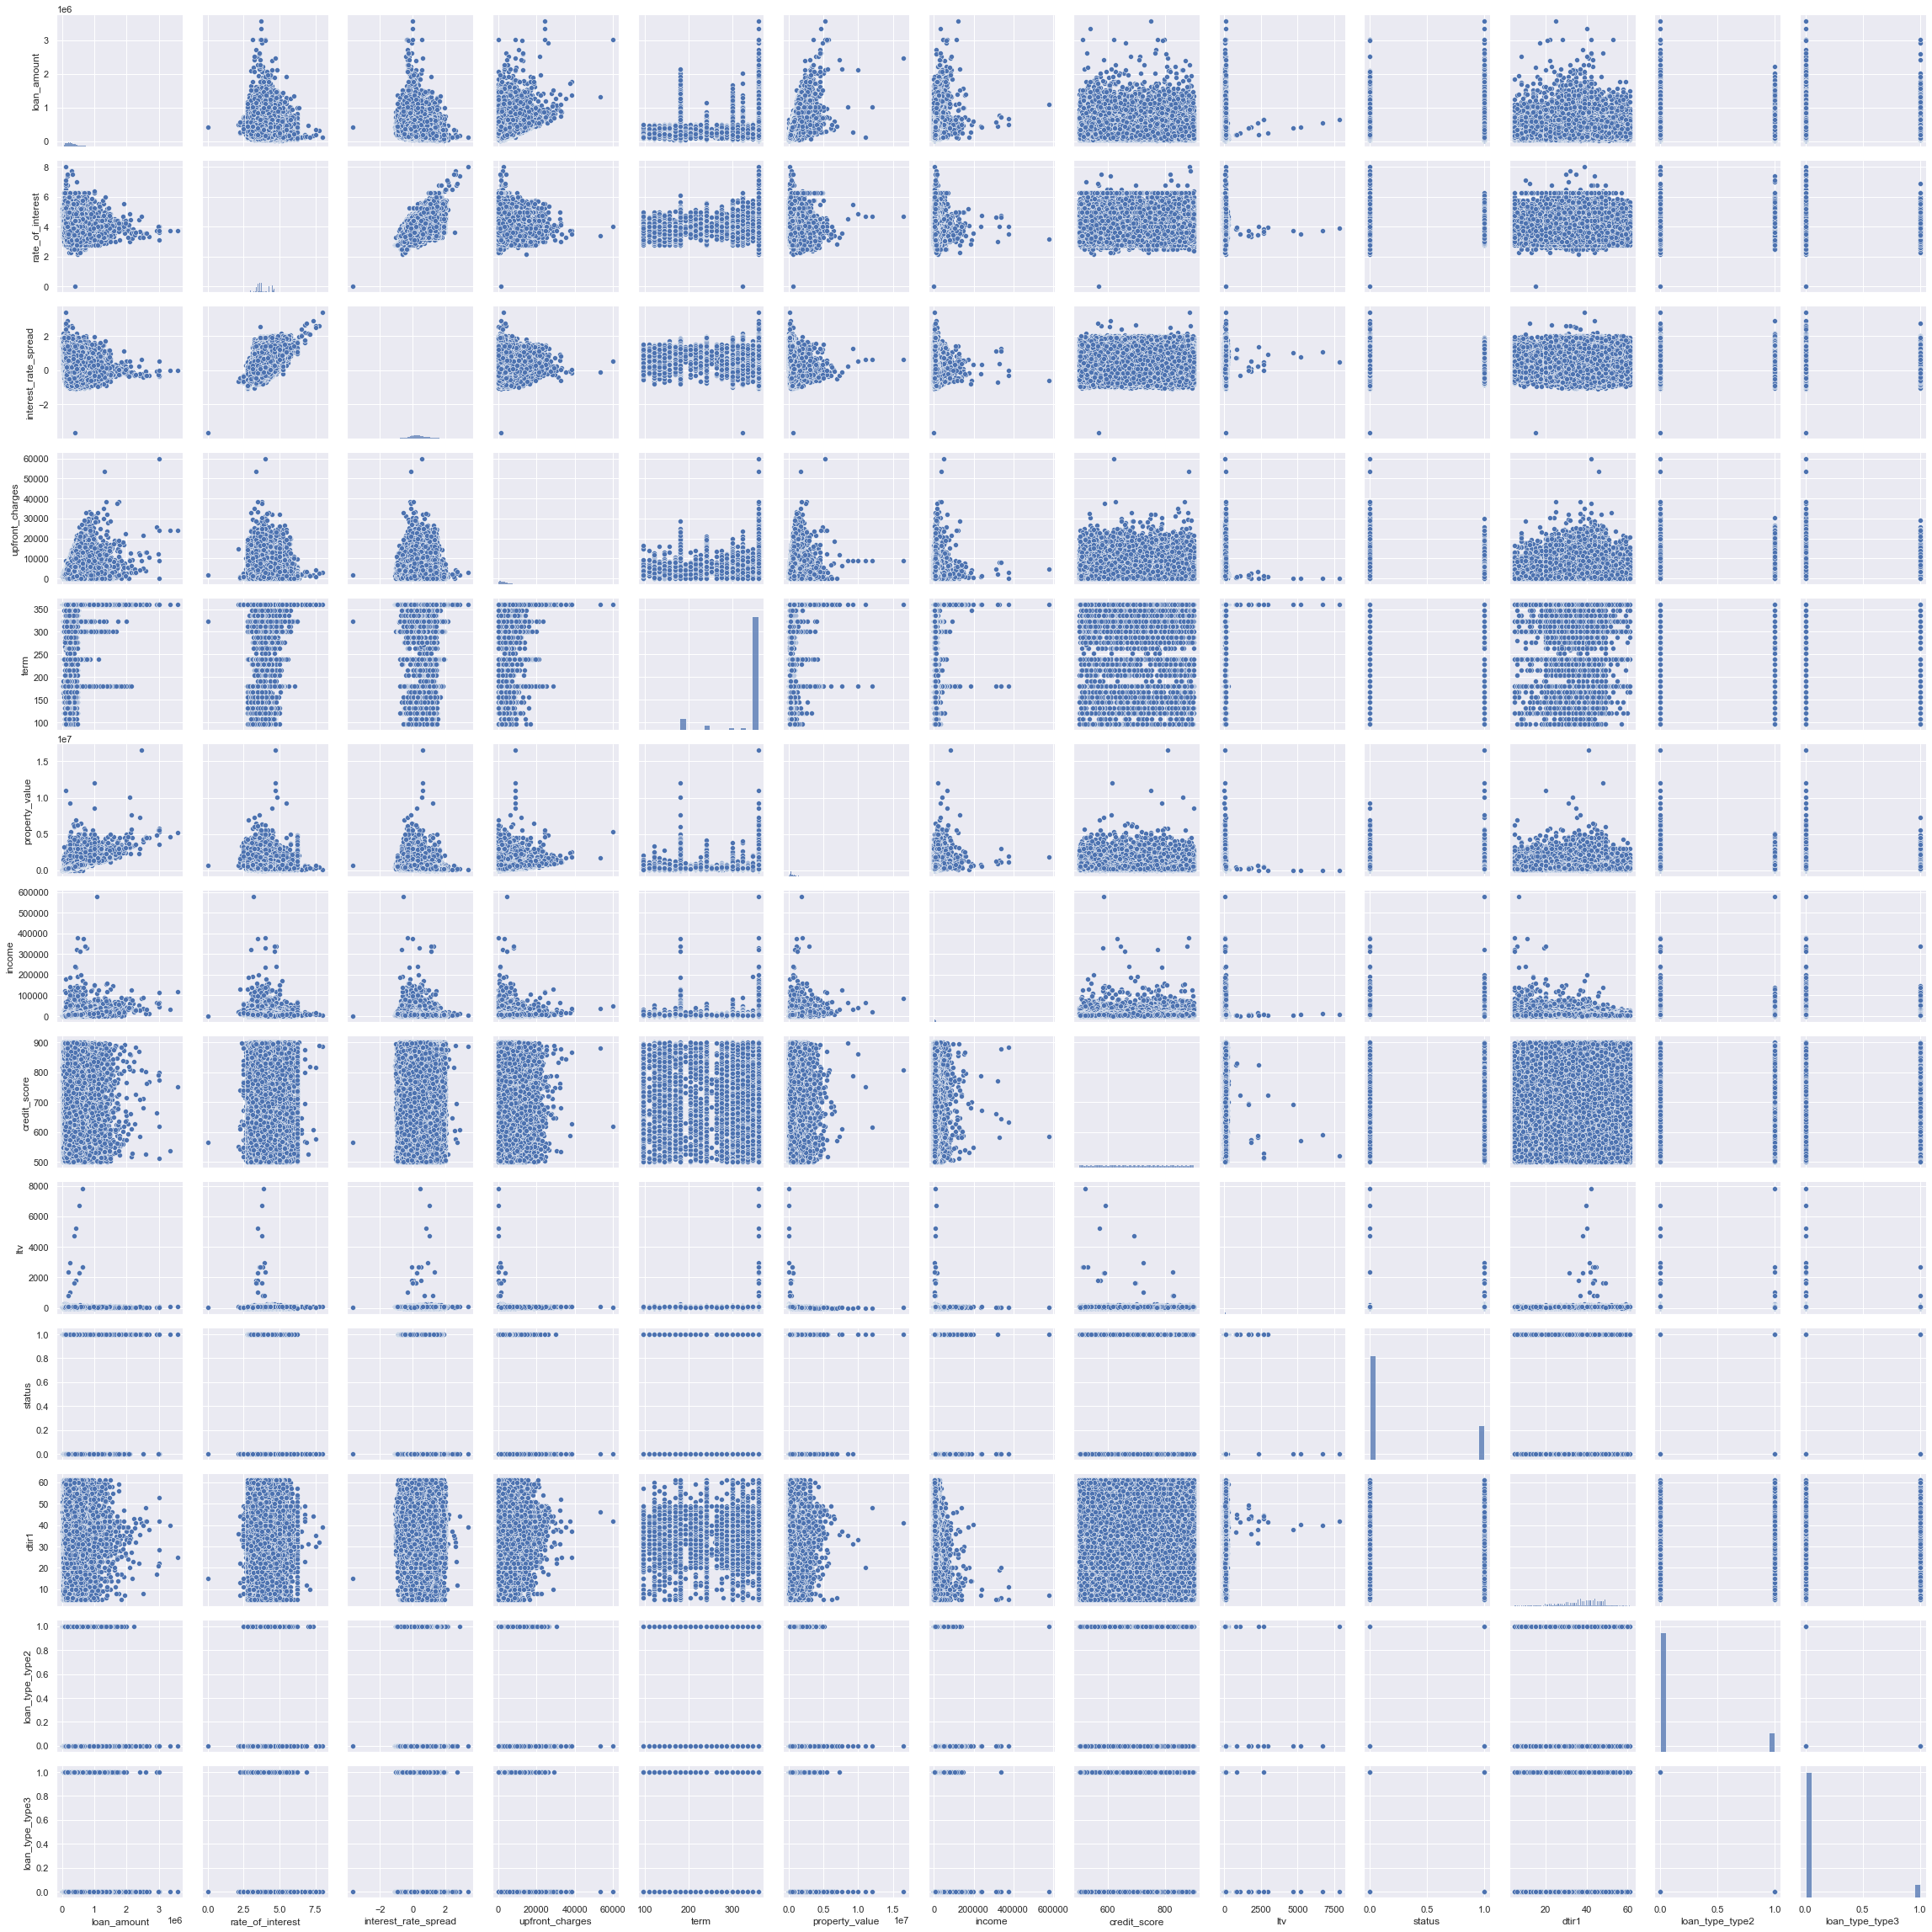

In [101]:
sns.pairplot(loan_data_comb)

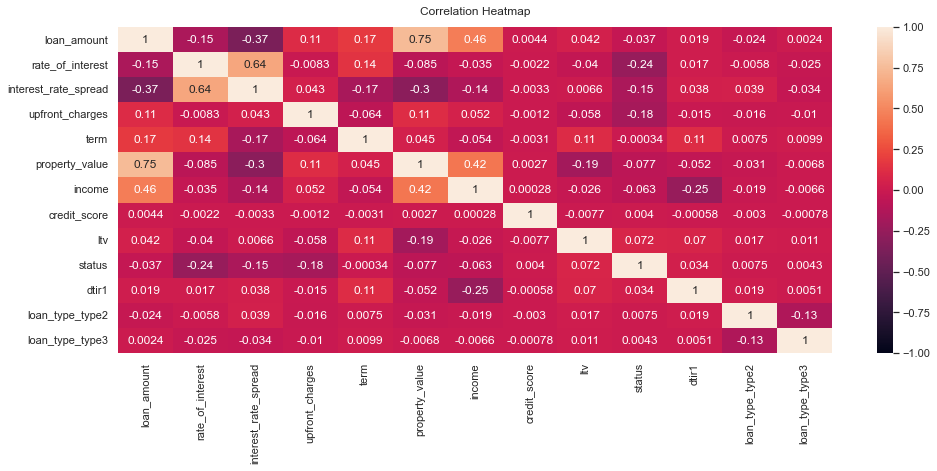

In [102]:
# Now we can plot a heatmap to see correlations 
corr = loan_data_comb.corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Strong Correlation**

- Loan amount : Property value (.75)
- Rate of interest : Interest rate spread (.64)

**Moderately Strong Negative Correlation**

- Loan amount : Interest rate spread (.37)
- Income : Dtir1 (.25)

There is a relatively strong correlation (0.75) between the loan amount and property value variables respectively. To present it visually we call the lineplot() method on our sns object. Make the x-axis parameter 'loan_amount', the y-axis parameter 'propert_value'.

'Status' is our dependent variable for regression analysis and we can plot each of our attributes using "status" as a hue parameter.

<AxesSubplot:xlabel='loan_amount', ylabel='property_value'>

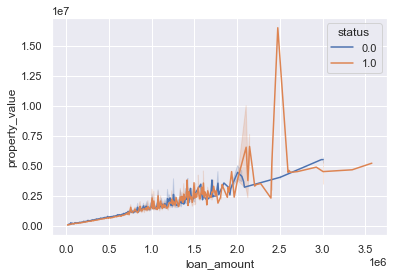

In [158]:
sns.lineplot(data=loan_data_comb, x ="loan_amount", y ="property_value", hue = "status")

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

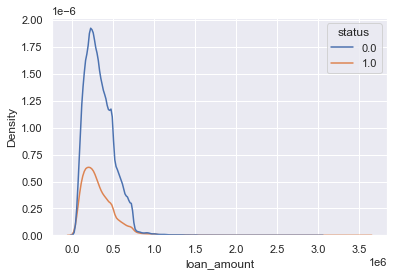

In [136]:
sns.kdeplot(data=loan_data_comb, x="loan_amount", hue="status")

<AxesSubplot:xlabel='property_value', ylabel='Density'>

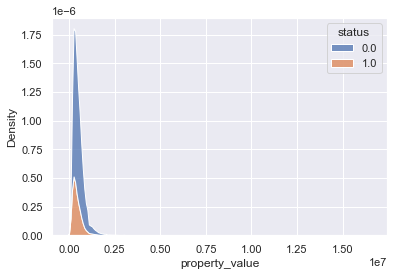

In [146]:
sns.kdeplot(data=loan_data_comb, x="property_value", hue="status", multiple="stack")

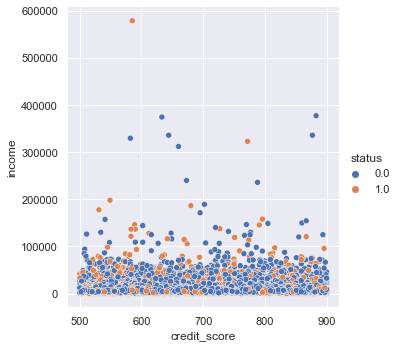

In [180]:
sns.relplot(data=loan_data_comb, x = "credit_score", y = "income", hue = "status")

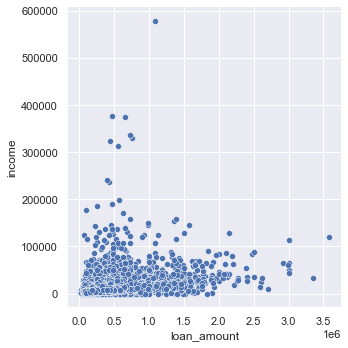

In [143]:
sns.relplot(data=loan_data_comb, x ="loan_amount", y ="income")

<AxesSubplot:xlabel='loan_amount', ylabel='income'>

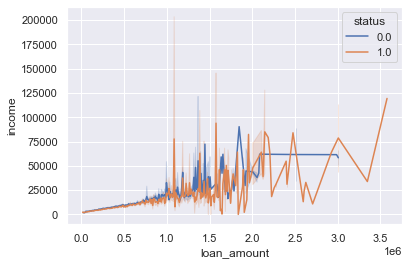

In [194]:
sns.lineplot(data=loan_data_comb, x ="loan_amount", y ="income", hue = "status")

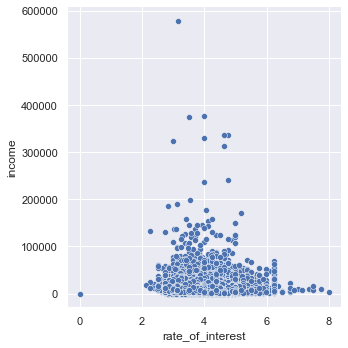

In [142]:
sns.relplot(data=loan_data_comb, x ="rate_of_interest", y ="income")

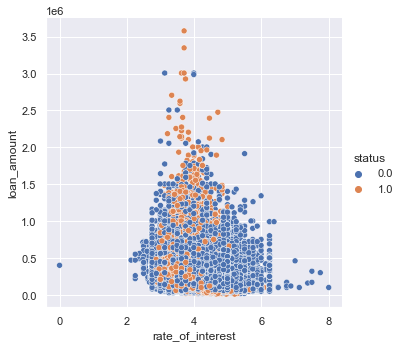

In [144]:
sns.relplot(data=loan_data_comb, x ="rate_of_interest", y ="loan_amount", hue="status")

<AxesSubplot:xlabel='loan_type', ylabel='count'>

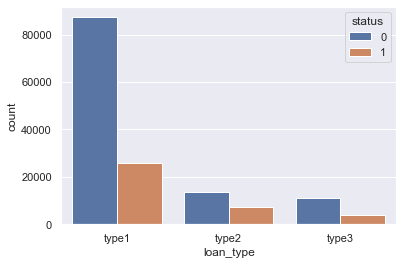

In [137]:
sns.countplot(data=loan_data, x="loan_type", hue="status")

<AxesSubplot:xlabel='status', ylabel='loan_amount'>

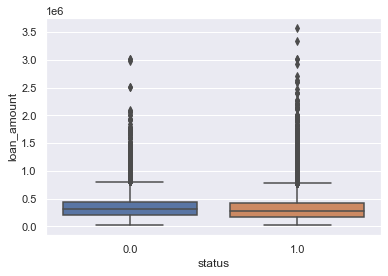

In [150]:
sns.boxplot(data=loan_data_comb, x="status", y ="loan_amount")

<AxesSubplot:xlabel='ltv', ylabel='Count'>

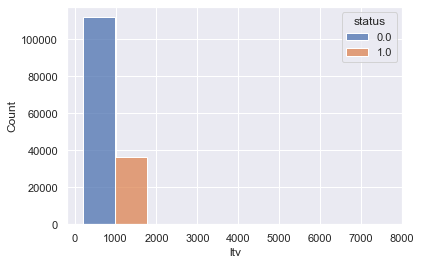

In [185]:
sns.histplot(data=loan_data_comb, x='ltv', hue="status", multiple="dodge", shrink=.8, bins=4)

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

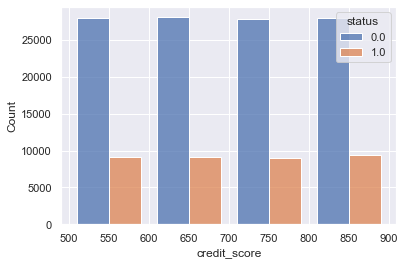

In [184]:
sns.histplot(data=loan_data_comb, x="credit_score", hue="status", multiple="dodge", shrink=.8, bins=4)

<AxesSubplot:xlabel='dtir1', ylabel='Count'>

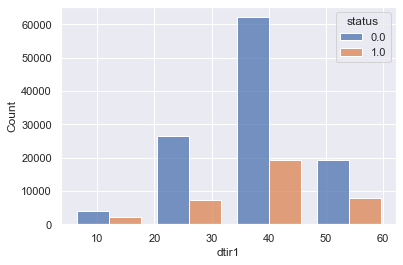

In [187]:
sns.histplot(data=loan_data_comb, x='dtir1', hue="status", multiple="dodge", shrink=.8, bins=4)

## Summary <a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

The findings from the EDA analysis of the variables and correlations revealed that the strongest positive correlation ((r=0.75) is between the **Loan amount** and **Property value** variables. This makes sense, as typically the higher loan amounts tend to correspond to more expensive properties. Several factors that can couse this correlation are:
- Market Demand and Property Prices: In areas where property prices are generally high due to strong demand or limited supply, borrowers may require larger loan amounts to afford properties in those markets.

- Property Evaluation: Property value is often assessed by considering factors such as location, size, amenities, condition, and market trends.

- Borrower Qualifications: Lenders evaluate borrowers' income, credit history, and debt-to-income ratio when determining loan amounts. Higher loan amounts may be approved for borrowers with higher incomes and better financial profiles, who are more likely to be able to afford properties with higher values.

Additionally, there was a moderately strong correlation between the **Rate of interest** and **Interest rate spread** (r=0.64). It appears that they are typically correlated because the interest rate spread is a measure of the difference between two interest rates. The interest rate spread is calculated by subtracting a reference interest rate (such as a benchmark rate) from the actual interest rate charged by a lender.

There were two weak-moderately strength negative correlations. The first, between **Loan amount** and **Interest rate spread** (r=-0.37), what can be influenced by multiple factors like market conditions, the borrower's credit history, the loan's duration, and the lender's pricing strategy. Lenders may be more willing to provide competitive rates and narrower spreads for larger loans as they perceive them to be less risky due to factors like the borrower's creditworthiness, collateral, or the potential profitability of the loan.

The second, between **Income** and **Debt-to-Income Ratio (DTIR)** (r=-0.25), what can be caused because the DTIR is calculated by dividing an individual's monthly debt obligations by their monthly income.
A lower DTIR indicates that a smaller portion of a person's income is allocated towards debt payments, which generally suggests a healthier financial position and better ability to manage debt. On the other hand, a higher DTIR indicates that a larger portion of income is allocated towards debt, which may suggest a higher risk of financial strain or difficulty in meeting debt obligations. Therefore, when income increases, assuming debt obligations remain constant, the DTIR decreases. This negative correlation means that as income rises, the proportion of income allocated to debt payments decreases, resulting in a lower DTIR. Conversely, if income decreases, the proportion of income allocated to debt payments increases, leading to a higher DTIR.
It's important to note that this negative correlation assumes debt obligations remain constant. If a person takes on more debt without a corresponding increase in income, the DTIR could increase even if income remains the same or decreases.